In [ ]:
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Crisp Methodology**

![](https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png)
    Crisp methodology is on the acceptable manners for data mining tasks. As it is belowed in the following figure, it contains three main parts should be passed to deliver a product to business
*     Data cleaning
        1. Understanding the business and data.
        2. Try to comprehent the business and extract the data which is needed
        3. Understand the dependencies between attributes. Analyzing the target variables. Handling missing values. Transforming data formats to standard data format.
*     Data Modeling
        1. Understanding the business and data.
        2. Selecting more accurate classfier or regression engine based on the charactristic any of them have.
        3. Train a model 
*     Evaluation and Deployment.
        1. Evalute created model using evaluation methods (test-data, cross-validation, etc)
        2. Catrefully Evaluate model with real data (i.e AB testing) (As it is shown in crisp diagram, there is a link between business undestanding and evaluation part). 
        3. Migrate to new model and replace the old one with new version.


**imports**
*     Importing packages and libraries.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

**Reading Data**

Reading data and caughting a glimpse of what data it is.

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

/Users/nityansuman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [3]:
train_data.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [4]:
list(train_data.columns.values)

['channelGrouping',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'sessionId',
 'socialEngagementType',
 'totals',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime']

**Features descriptions**:

Returning back to Data description for understanding features.

*     channelGrouping - The channel via which the user came to the Store.
*     date - The date on which the user visited the Store.
*     device - The specifications for the device used to access the Store.
*     fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
*     geoNetwork - This section contains information about the geography of the user.
*     sessionId - A unique identifier for this visit to the store.
*     socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
*     totals - This section contains aggregate values across the session.
*     trafficSource - This section contains information about the Traffic Source from which the session originated.
*     visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
*     visitNumber - The session number for this user. If this is the first session, then this is set to 1.
*     visitStartTime - The timestamp (expressed as POSIX time).


**channelGrouping feature**

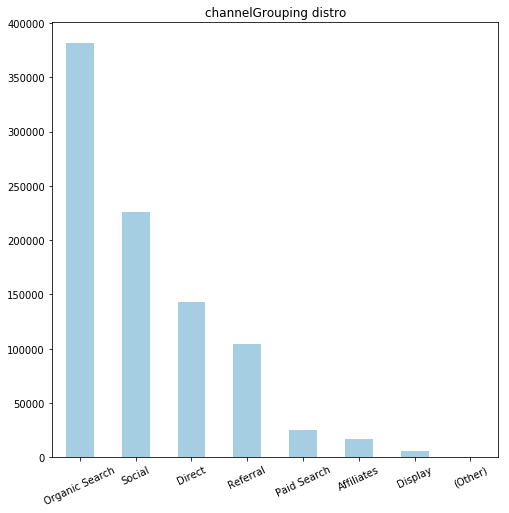

In [5]:
train_data.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping distro",figsize=(8,8),rot=25,colormap='Paired')

**date and visitStartTime**

There are two varialbe related to time and can be used in time dependent analyzes specially TimeSeries.

In [6]:
"date :{}, visitStartTime:{}".format(train_data.head(1).date[0],train_data.head(1).visitStartTime[0])

'date :20160902, visitStartTime:1472830385'

date is stored in String and should be converted to pandas datetime format.
visitStartTime is stored in epoch unix format and should be converted to pandas datetime format.
doing the correspondence transforms and storing on the same attribute.

In [7]:
train_data["date"] = pd.to_datetime(train_data["date"],format="%Y%m%d")
train_data["visitStartTime"] = pd.to_datetime(train_data["visitStartTime"],unit='s')

Checking the transformed features.

In [8]:
train_data.head(1)[["date","visitStartTime"]]

,date,visitStartTime
0,2016-09-02,2016-09-02 15:33:05


**device**

device is stored in json format. There is a need to extract its fields and analyze them. Using json library to deserializing json values.

In [9]:
list_of_devices = train_data.device.apply(json.loads).tolist()
keys = []
for devices_iter in list_of_devices:
    for list_element in list(devices_iter.keys()):
        if list_element not in keys:
            keys.append(list_element)

keys existed in device attribute are listed below.
Now we should ignore the features which are not usefull in rest of the process. If feature is misrelated, or it contains lot of "NaN" values it should be discarded.
We select the ["browser","operatingSystem","deviceCategory","isMobile"] for doing the analyzing. The rest of the device features are ignored and will be removed.

In [10]:
"keys existed in device attribute are:{}".format(keys)

"keys existed in device attribute are:['browser', 'browserVersion', 'browserSize', 'operatingSystem', 'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors', 'screenResolution', 'deviceCategory']"

In [11]:
tmp_device_df = pd.DataFrame(train_data.device.apply(json.loads).tolist())[["browser","operatingSystem","deviceCategory","isMobile"]]

In [12]:
tmp_device_df.head()

,browser,operatingSystem,deviceCategory,isMobile
0,Chrome,Windows,desktop,False
1,Firefox,Macintosh,desktop,False
2,Chrome,Windows,desktop,False
3,UC Browser,Linux,desktop,False
4,Chrome,Android,mobile,True


In [13]:
tmp_device_df.describe()

,browser,operatingSystem,deviceCategory,isMobile
count,903653,903653,903653,903653
unique,54,20,3,2
top,Chrome,Windows,desktop,False
freq,620364,350072,664479,664530


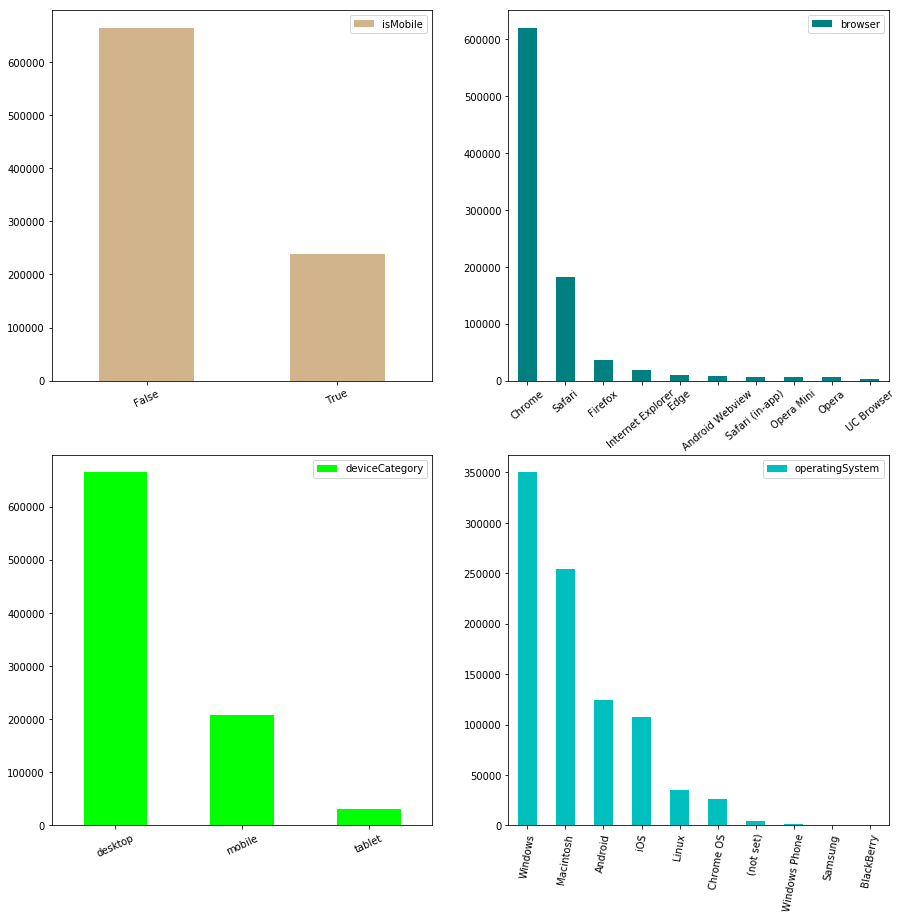

In [14]:
fig, axes = plt.subplots(2,2,figsize=(15,15))
tmp_device_df["isMobile"].value_counts().plot(kind="bar",ax=axes[0][0],rot=25,legend="isMobile",color='tan')
tmp_device_df["browser"].value_counts().head(10).plot(kind="bar",ax=axes[0][1],rot=40,legend="browser",color='teal')
tmp_device_df["deviceCategory"].value_counts().head(10).plot(kind="bar",ax=axes[1][0],rot=25,legend="deviceCategory",color='lime')
tmp_device_df["operatingSystem"].value_counts().head(10).plot(kind="bar",ax=axes[1][1],rot=80,legend="operatingSystem",color='c')

**geoNetwork**

It is json and the similar manner to previous feature (device) should be done.


In [15]:
tmp_geo_df = pd.DataFrame(train_data.geoNetwork.apply(json.loads).tolist())[["continent","subContinent","country","city"]]

In [16]:
tmp_geo_df.head()

,continent,subContinent,country,city
0,Asia,Western Asia,Turkey,Izmir
1,Oceania,Australasia,Australia,not available in demo dataset
2,Europe,Southern Europe,Spain,Madrid
3,Asia,Southeast Asia,Indonesia,not available in demo dataset
4,Europe,Northern Europe,United Kingdom,not available in demo dataset


In [17]:
tmp_geo_df.describe()

,continent,subContinent,country,city
count,903653,903653,903653,903653
unique,6,23,222,649
top,Americas,Northern America,United States,not available in demo dataset
freq,450377,390657,364744,508229


analysing the distribution of users in 5 continents.

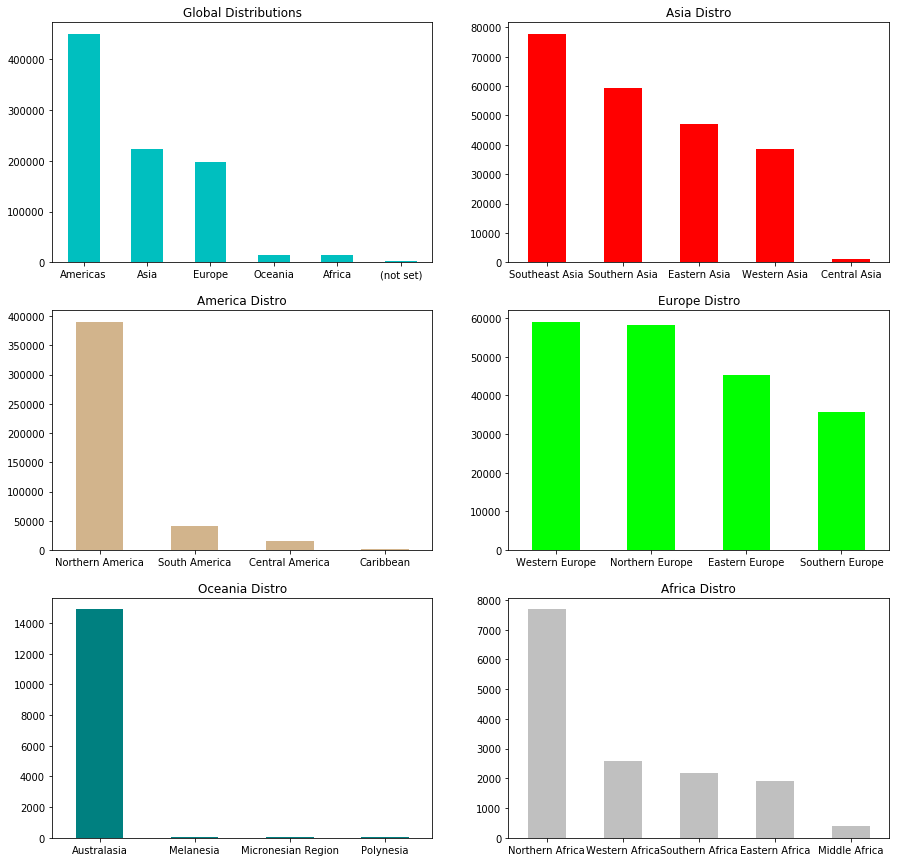

In [18]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
tmp_geo_df["continent"].value_counts().plot(kind="bar",ax=axes[0][0],title="Global Distributions",rot=0,color="c")
tmp_geo_df[tmp_geo_df["continent"] == "Americas"]["subContinent"].value_counts().plot(kind="bar",ax=axes[1][0], title="America Distro",rot=0,color="tan")
tmp_geo_df[tmp_geo_df["continent"] == "Asia"]["subContinent"].value_counts().plot(kind="bar",ax=axes[0][1], title="Asia Distro",rot=0,color="r")
tmp_geo_df[tmp_geo_df["continent"] == "Europe"]["subContinent"].value_counts().plot(kind="bar",ax=axes[1][1],  title="Europe Distro",rot=0,color="lime")
tmp_geo_df[tmp_geo_df["continent"] == "Oceania"]["subContinent"].value_counts().plot(kind="bar",ax = axes[2][0], title="Oceania Distro",rot=0,color="teal")
tmp_geo_df[tmp_geo_df["continent"] == "Africa"]["subContinent"].value_counts().plot(kind="bar" , ax=axes[2][1], title="Africa Distro",rot=0,color="silver")

**socialEngagementType**

Describing this feature confirms its uniqueness. It should be dropped. Because its entropy is 0. 

In [19]:
train_data["socialEngagementType"].describe()

count                   903653
unique                       1
top       Not Socially Engaged
freq                    903653
Name: socialEngagementType, dtype: object

**totals**


In [20]:
train_data.head()
train_data["revenue"] = pd.DataFrame(train_data.totals.apply(json.loads).tolist())[["transactionRevenue"]]


In [21]:
train_data.head(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,revenue
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,2016-09-02 15:33:05,NaN
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,2016-09-03 05:22:27,NaN
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,2016-09-03 01:16:26,NaN
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,2016-09-03 05:40:13,NaN
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,2016-09-02 13:23:20,NaN


Extracting all the revenues can bring us an overview about the total revenue.

In [22]:
revenue_datetime_df = train_data[["revenue" , "date"]].dropna()
revenue_datetime_df["revenue"] = revenue_datetime_df.revenue.astype(np.int64)
revenue_datetime_df.head()

,revenue,date
752,37860000,2016-09-02
753,306670000,2016-09-02
799,68030000,2016-09-02
802,26250000,2016-09-02
859,574150000,2016-09-02


Aggregation on days and plotting daily revenue.

In [ ]:
daily_revenue_df = revenue_datetime_df.groupby(by=["date"],axis = 0 ).sum()
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Daily Revenue")
axes.set_ylabel("Revenue")
axes.set_xlabel("date")
axes.plot(daily_revenue_df["revenue"])


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
axes.set_title("Daily revenue Violin")
axes.set_ylabel("revenue")
axes.violinplot(list(daily_revenue_df["revenue"].values),showmeans=False,showmedians=True)

**visitNumber**

Number of visits have profound potential to be an important factor in regression progress. 

In [ ]:
visit_datetime_df = train_data[["date","visitNumber"]]
visit_datetime_df["visitNumber"] = visit_datetime_df.visitNumber.astype(np.int64)

In [ ]:
daily_visit_df = visit_datetime_df.groupby(by=["date"], axis = 0).sum()

fig, axes = plt.subplots(1,1,figsize=(20,10))
axes.set_ylabel("# of visits")
axes.set_xlabel("date")
axes.set_title("Daily Visits")
axes.plot(daily_visit_df["visitNumber"])

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
axes.set_title("Daily visits Violin")
axes.set_ylabel("# of visitors")
axes.violinplot(list(daily_visit_df["visitNumber"].values),showmeans=False,showmedians=True)

**trafficSource**

What is the most conventional manner for visitor who visit to the website and do their shopping ? trafficSource attribute can resolve this qurestion.
Like a previous Json elements existed in the dataset, this attribute is also Json file. so, we use the similar way to deserialize it. We have select keyword, source and the medium as a features which can bring more useful infromation.


In [ ]:
traffic_source_df = pd.DataFrame(train_data.trafficSource.apply(json.loads).tolist())[["keyword","medium" , "source"]]

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,10))
traffic_source_df["medium"].value_counts().plot(kind="bar",ax = axes[0],title="Medium",rot=0,color="tan")
traffic_source_df["source"].value_counts().head(10).plot(kind="bar",ax=axes[1],title="source",rot=75,color="teal")

As it is completely obvious in source diagram, google is the most repetitive source. It would be interesting if we replace all google subdomains with exact 'google' and do the same analyze again. let's do it.

In [ ]:
traffic_source_df.loc[traffic_source_df["source"].str.contains("google") ,"source"] = "google"
fig,axes = plt.subplots(1,1,figsize=(8,8))
traffic_source_df["source"].value_counts().head(15).plot(kind="bar",ax=axes,title="source",rot=75,color="teal")

Google dependent redirects are more than twice the youtube sources. Combination of this feature with revenue and visits may have important result. We will do it in next step (when we are analyzing feature correlations).
Now let's move on keywords feature.
A glance to keyword featre represnets lot of missing values '(not provided)'. Drawing a bar chart for both of them...


In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,10))
traffic_source_df["keyword"].value_counts().head(10).plot(kind="bar",ax=axes[0], title="keywords (total)",color="orange")
traffic_source_df[traffic_source_df["keyword"] != "(not provided)"]["keyword"].value_counts().head(15).plot(kind="bar",ax=axes[1],title="keywords (dropping NA)",color="c")